# I'm Moving to Gadfly
### Christina Lee

So far in this blog, all my plots have either used PyPlot, or the experimental GLVisualize. BUT, NO LONGER! 

While writing up my research notes, I've been trying to improve my PyPlot graphs. I was hoping for them to look nicer; Julia's PyPlot was saying no.  We had a falling out over background colors and resolution. So, I have decided to move on to a  plotting partner more willing to cope with my demands.  

When I first started learning Julia, Gadfly seemed too unfamiliar, and control too tricky. I didn't give it much further thought.  After some digging, Gadfly has changed my mind, and I hope today I can change yours too.  Right now, like Julia, Gadfly doesn't have the maturity or documentation of PyPlot, but once it does, you better watch out.  

<img src="../images/Gadfly/bitmap_VS_SVG.SVG" width="400px" style="float: left; margin: 20px"/> 
Gadfly preferentially produces plots in <b>SVG</b> (scalable vector graphics) form, instead of the rasterized form of PNG or JPG favored by PyPlot.  As displayed in the figure left, rasterized images are composed of colored squares,  so don't look the best when highly magnifified.  SVG, which is based on XML, stores the position of vector elements and scales to high resolution without artifacts.  Tools such as [Inkscape](https://inkscape.org/) also work in SVG, and can edit the individual pieces of a graph since they haven't been rasterized together.

## Let's plot some graphs!

<sub><sub>By Yug, modifications by 3247 (Unknown) [CC BY-SA 2.5 (http://creativecommons.org/licenses/by-sa/2.5)], via Wikimedia Commons</sub></sub>
</div><i class="fa fa-lightbulb-o "></i>

In [1]:
# Time to load our Packages
#Pkg.update()
#Pkg.add("Gadfly")
using Gadfly

#Pkg.add("Compose")
using Compose

In [3]:
# Some test data
x=collect(1:.4:10);
y1=sin(x);
y2=cos(x);

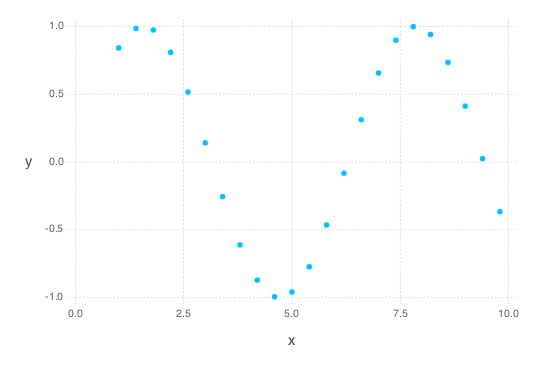

In [4]:
# A simple plot
plot(x=x,y=y1)

Unlike PyPlot, we can give `plot` functions as well as points.  After receiving a function, a max value, and a min value, Gadfly figures everything else out for itself.  

For the function, we can pass in either an inbuilt function, a user defined function, or an anonymous function.

The brackets [ ] allow us to group multiple functions together in the plot.

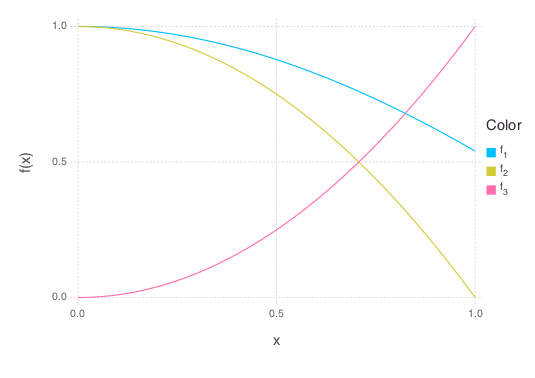

In [5]:
# plotting function

function testfunction(x::Real)
    return 1-x^2
end

plot([cos,testfunction,x->x^2],0,1)

But that's just one set of points...
How do we plot more than one set of data?  That's where layers come in.  Instead of using `plot`, we use `layer`, and set it as a variable.  We can then `plot` those layers.  

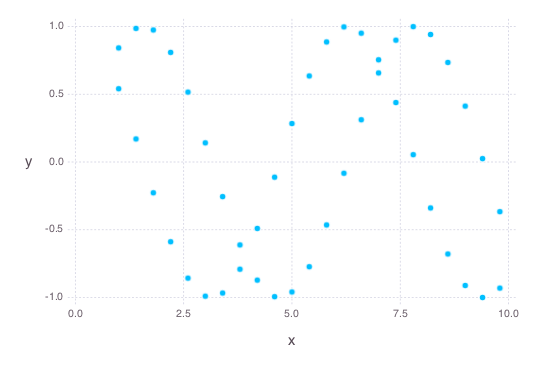

In [6]:
p1=layer(x=x,y=y1,Geom.point)
p2=layer(x=x,y=y2,Geom.point)
plot(p1,p2)

## Different style of plotting: Geom
Now, what if we want to plot something other than lines?  
Gadfly allows a wide variety of other ways to plot our data.  We control this with the `Geom` (Geometry) object.  

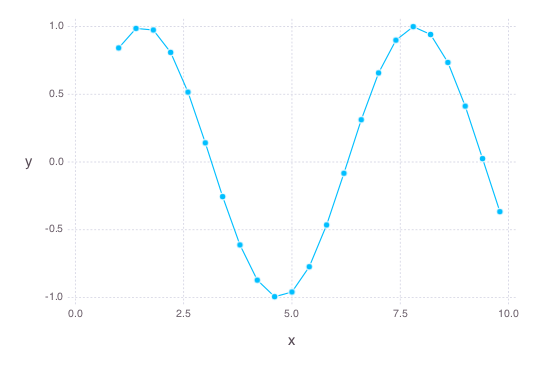

In [7]:
plot(x=x,y=y1,Geom.point,Geom.line)

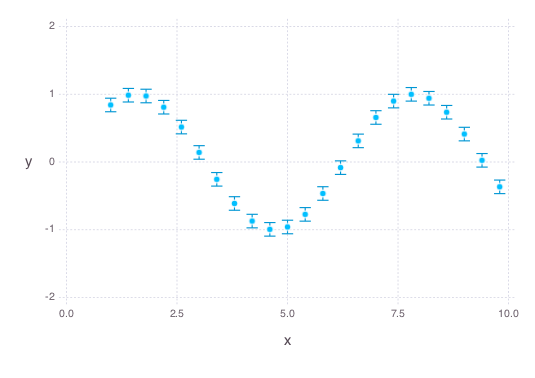

In [8]:
plot(x=x,y=y1,ymin=y1-.1,ymax=y1+.1,Geom.point,Geom.errorbar)

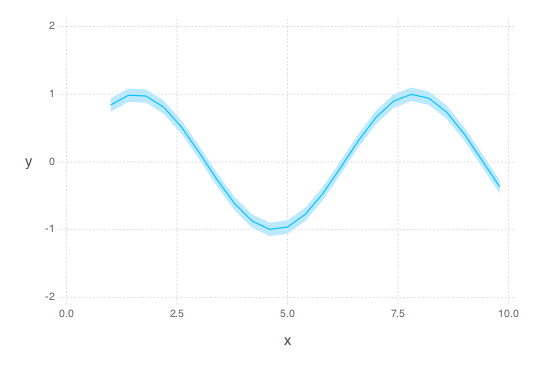

In [9]:
plot(x=x,y=y1,ymin=y1-.1,ymax=y1+.1,Geom.line,Geom.ribbon)

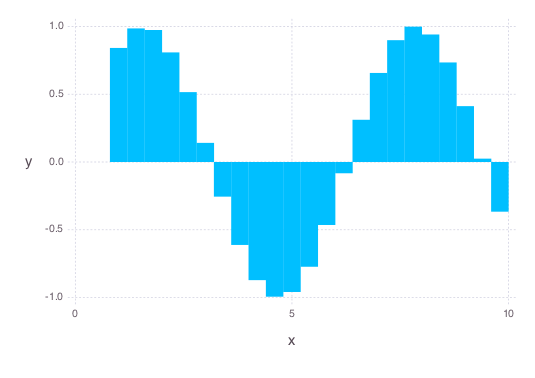

In [10]:
plot(x=x,y=y1,Geom.bar)

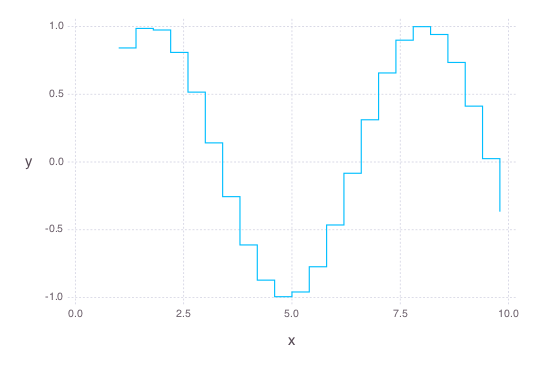

In [11]:
plot(x=x,y=y1,Geom.step)

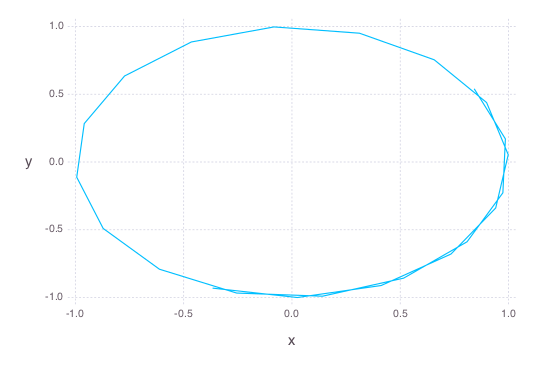

In [12]:
plot(x=y1,y=y2,Geom.path())

## Edit Point and Line style

<b>Disclaimer:</b> I've learned how to do the next two things by reading the code, not the documentation. 

It seems like they are newer and less developed features than everything else I'm discussing here.  The syntax seems less polished than in other areas, so I believe it's still under construction. 

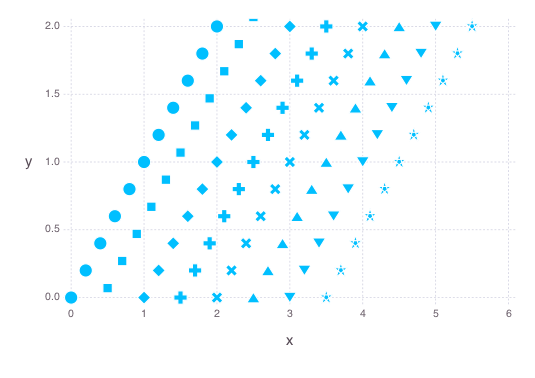

In [13]:
z=collect(0:.2:2)

xp=[z;z+.5;z+1;z+1.5;z+2;z+2.5;z+3;z+3.5]
yp=[z;z;z;z;z;z;z;z]
sh=[ones(z);2*ones(z);3*ones(z);4*ones(z);5*ones(z);6*ones(z);7*ones(z);8*ones(z)]

plot(x=xp,y=yp,shape=sh,Geom.point,Theme(default_point_size=5pt))

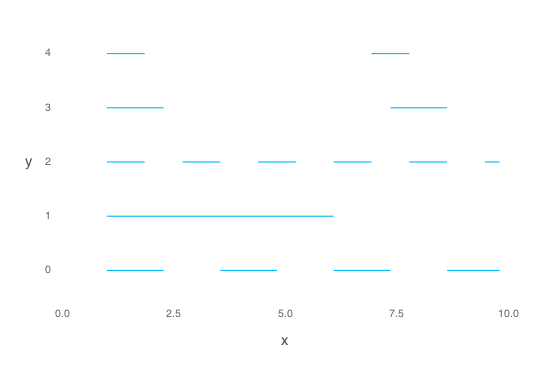

In [14]:
# or Compose.mm for smaller sizes
# These ratios and numbers changed around how ever you like

dash = 6 * Compose.cm
dot = 1.5 * Compose.cm
gap = 1 * Compose.cm 

l1=layer(x=x,y=zeros(x),Geom.line,Theme(line_style=[dot]))
l2=layer(x=x,y=ones(x),Geom.line,Theme(line_style=[dash]))
l3=layer(x=x,y=2*ones(x),Geom.line,Theme(line_style=[gap]))
l4=layer(x=x,y=3*ones(x),Geom.line,Theme(line_style=[dot,dash,dot]))
l5=layer(x=x,y=4*ones(x),Geom.line,Theme(line_style=[gap,dash]))

plot(l1,l2,l3,l4,l5,Coord.Cartesian(ymin=-.5,ymax=4.5),Theme(grid_line_width=0pt))

## Guide: Labeling Axes
Where `Geom` alters how we plot, `Guide` alters the labeling.  
`Guide` ties in with `Compose.jl` through the `Guide.annotate` command, but that will take a tutorial in itself.  

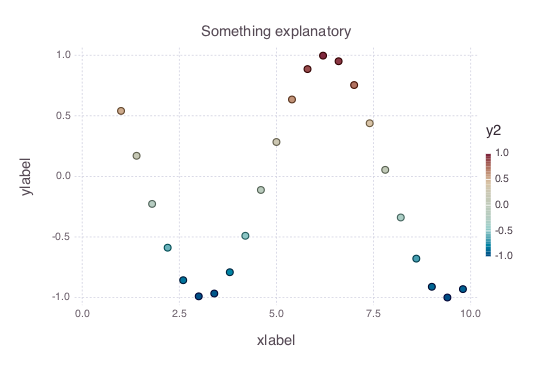

In [15]:
plot(x=x,y=y2,color=y2,
Guide.xlabel("xlabel"),Guide.ylabel("ylabel"),Guide.title("Something explanatory"),
Guide.colorkey("y2"))

Here's something we can do with a combination of `Guide` and `Scale`.  Using `Guide`, we can set where we specifically want our `xticks` to be, namely at multiples of $\pi$. But then, the labeling would write out some irrational number, making the plot look horrible.  So, we create a function that takes in a number and outputs a string label for `Scale` to use.  

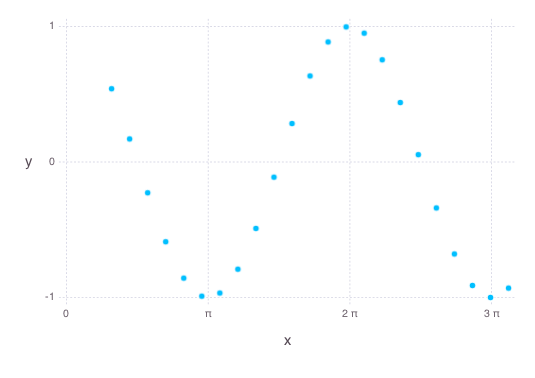

In [19]:
function labelname(x::Real)
    n=round(Int,x/π) #nearest integer*pi
    if n==0
        return "0"
    elseif n==1
        return "π"
    end
    return("$n π")
end

xmarks=[0,π,2π,3π]
ymarks=[-1,0,1]

plot(x=x,y=y2,
Guide.yticks(ticks=ymarks),
Guide.xticks(ticks=xmarks),Scale.x_continuous(labels=labelname))


Some other cool things we can do with `Scale`:
* Automatically transform the axis according to log, log10,log2, asinh, or sqrt.  
* Write numbers in :plain, :scientific, :engineering, or :auto

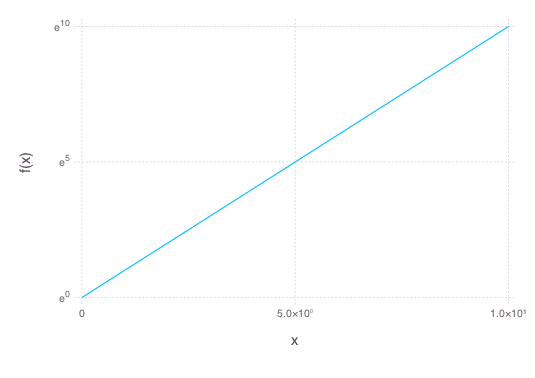

In [20]:
plot(x->exp(x),0,10,Scale.y_log,Scale.x_continuous(format=:scientific))

# Themes
I mostly chose Gadfly because of the control I could have with the `Theme` command.  http://dcjones.github.io/Gadfly.jl/themes.html has a much more exhaustive list than what I will be demonstrating with here.  

In [21]:
# Solarized Colors that I like working with
# http://ethanschoonover.com/solarized
using Colors
base03=parse(Colorant,"#002b36");
base02=parse(Colorant,"#073642");
base01=parse(Colorant,"#586e75");
base00=parse(Colorant,"#657b83");
base0=parse(Colorant,"#839496");
base1=parse(Colorant,"#839496");
base2=parse(Colorant,"#eee8d5");
base3=parse(Colorant,"#fdf6e3");

yellow=parse(Colorant,"#b58900");
orange=parse(Colorant,"#cb4b16");
red=parse(Colorant,"#dc322f");
magenta=parse(Colorant,"#d33682");
violet=parse(Colorant,"#6c71c4");
blue=parse(Colorant,"#268bd2");
cyan=parse(Colorant,"#3aa198");
green=parse(Colorant,"#859900");

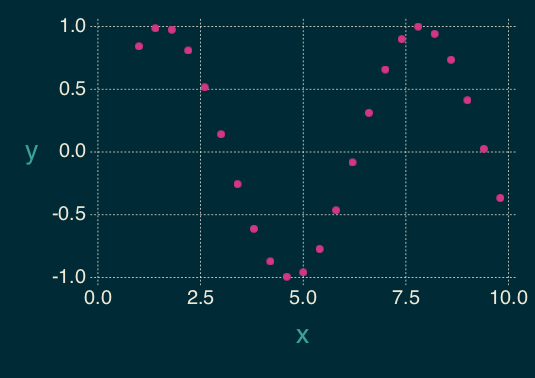

In [27]:
plot(x=x,y=y1,
    Theme(highlight_width=0pt, # lose the white ring around the points
    default_point_size=3pt,    # size of the dots
    default_color=magenta,     # color of the dots
    background_color=base03,   # ... background color ...
    grid_color=base2,     # the lines
    minor_label_color=base2,  # numbers on axes color
    key_label_color=base2, # color key numbers color
    key_title_color=cyan,  # label of color key color 
    major_label_color=cyan, # axes label and title color
    major_label_font_size=20pt, # font size for axes label and title
    minor_label_font_size=15pt, #font size for numbers on axes
    panel_opacity=1 #setting background to opaque
);)

## Coord: Setting the boundries

The documentation states that you can change the range of the axes using `Scale`, but I've found it better to use this format to set my min and max values.

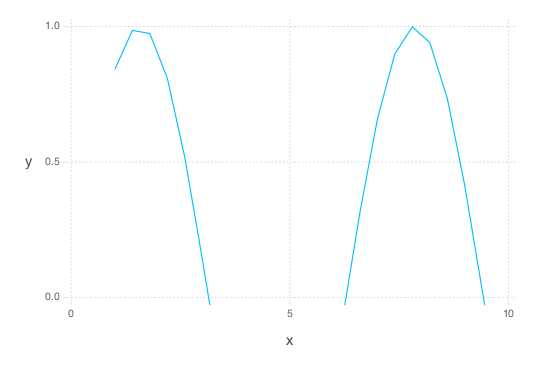

In [23]:
plot(x=x,y=y1,Geom.line,Coord.Cartesian(ymin=0,ymax=1,xmin=0,xmax=10))

So far, we have covered seperately `Guide`, `Themes`, and partially `Coord` and `Scale`. Individually, each aspect doesn't add too much clunkiness to the code. However, if we start to add everything together, then the plot function would look quite nasty.  

Luckily, just like layers for data points, we can put our modifiers into variables.  Then we can simply call the variables in our plot function.  

This also helps for when we want to use one theme for a series of graphs.  We can define the theme variable up top, and then include it in every graph there after, never having to declare it again.  This helps me to keep my graphs uniform in style.

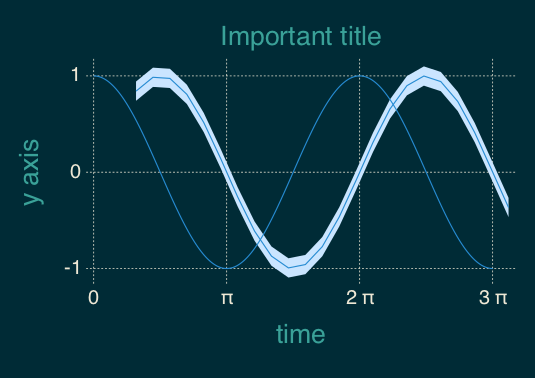

In [26]:
function labelname(x::Real)
    n=round(Int,x/π)
    if n==0
        return "0"
    elseif n==1
        return "π"
    else
        return("$n π")
    end
    return("$n π")
end

xticks=[0,π,2π,3π]
yticks=[-1,0,1]

data=layer(x=x,y=y1,ymin=y1-.1,ymax=y1+.1,Geom.line,Geom.ribbon)
f=layer(cos,0,3π)

yt=Guide.yticks(ticks=yticks)
xt=Guide.xticks(ticks=xticks)
xs=Scale.x_continuous(labels=labelname)

t= Theme(highlight_width=0pt,
    default_point_size=3pt,
    default_color=blue,
    background_color=base03, 
    grid_color=base2,
    minor_label_color=base2,
    key_label_color=base2,
    key_title_color=cyan,
    major_label_color=cyan,
    major_label_font_size=20pt,
    minor_label_font_size=15pt,
    panel_opacity=1)

xl=Guide.xlabel("time")
yl=Guide.ylabel("y axis")
GT=Guide.title("Important title")

plot(data,f,yt,xt,xs,t,xl,yl,GT)

Although we still have to  call quite a few variables, this is a much simpler way of doing things.

# Saving the Figure
Julia naturally saves to SVG (or SVGJS).  
We have to specify the `x` and `y` dimensions of the plot, but since these images rescale so easily, we can choose some reasonable numbers.

In [28]:
p=plot(data,f,yt,xt,xs,t,xl,yl,GT)
draw(SVG("myplot.svg", 15cm, 9cm), p)

If you want to save to PNG, PDF, or PS, the package Cairo.jl provides that ability.  

In [30]:
using Cairo
draw(PNG("myplot.png",15cm,9cm),p)

<center>
# Happy Plotting!